<a href="https://colab.research.google.com/github/josepeon/calculus_parsons/blob/main/2_2_calc_modeling_with_diffeq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.integrate import odeint, solve_ivp
size = (12, 9)
from ipywidgets import interact, widgets, fixed

In [4]:
x = sy.Symbol('x')
sy.integrate(1/x, x)

log(x)

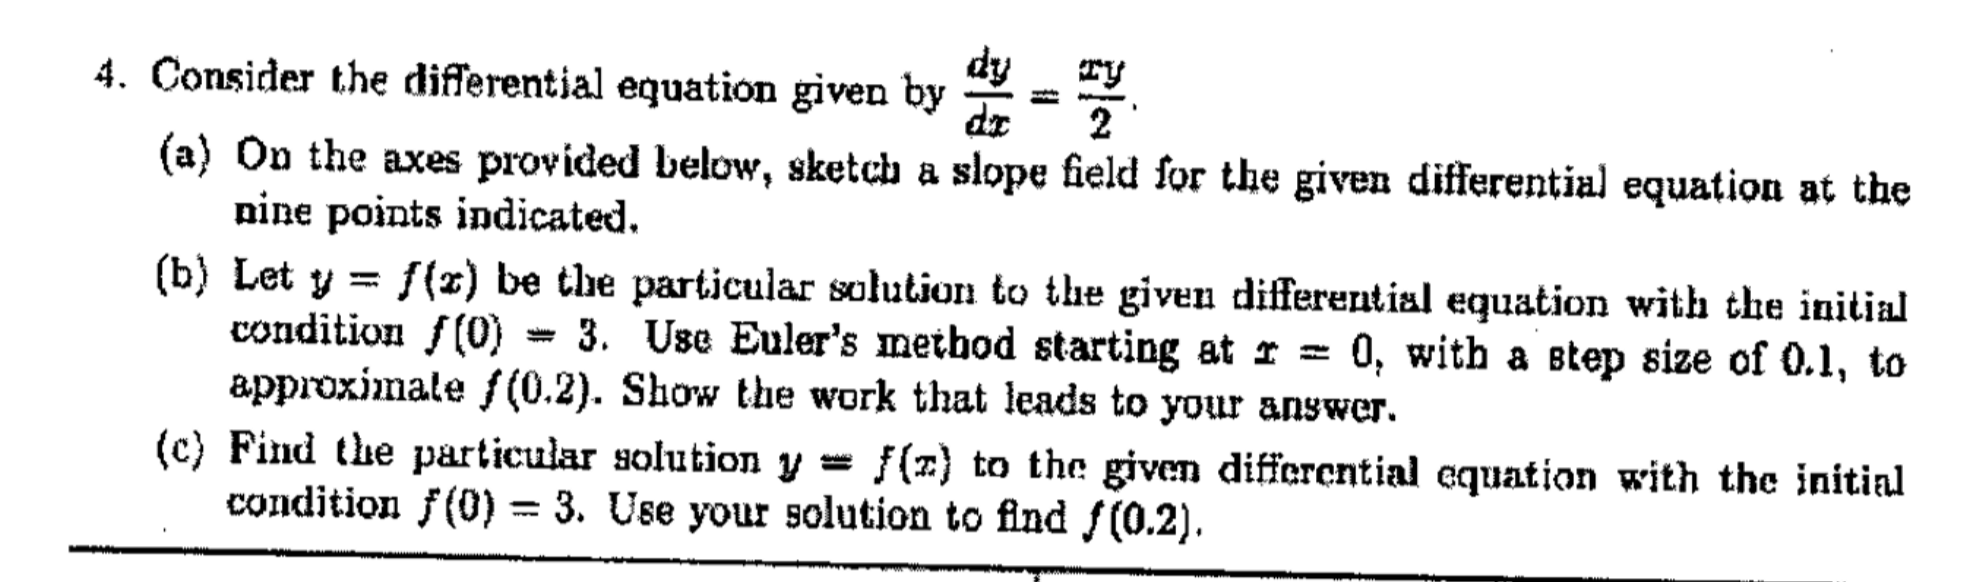

In [3]:
#draw a slope field


log(x)

In [ ]:
#approximate solution and show work


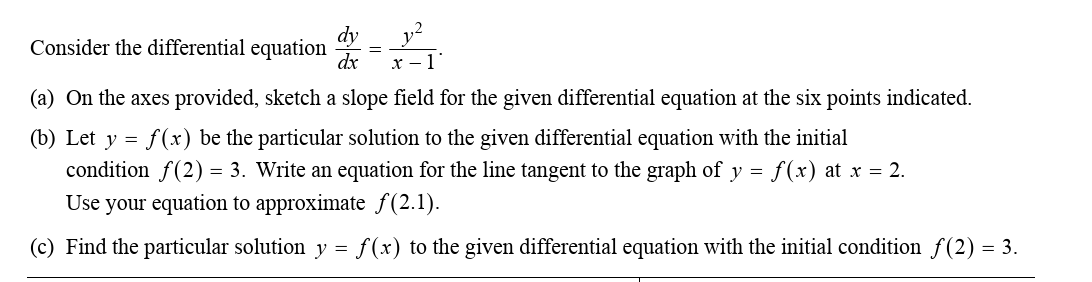

In [10]:
x = np.arange(-3,3)
y = np.arange(-3,3)
#grid of points
X, Y = np.meshgrid(x,y)
dy = Y**2/(X - 1)
dx = np.ones(dy.shape)

/tmp/ipython-input-681226248.py:5: RuntimeWarning: divide by zero encountered in divide
  dy = Y**2/(X - 1)
/tmp/ipython-input-681226248.py:5: RuntimeWarning: invalid value encountered in divide
  dy = Y**2/(X - 1)


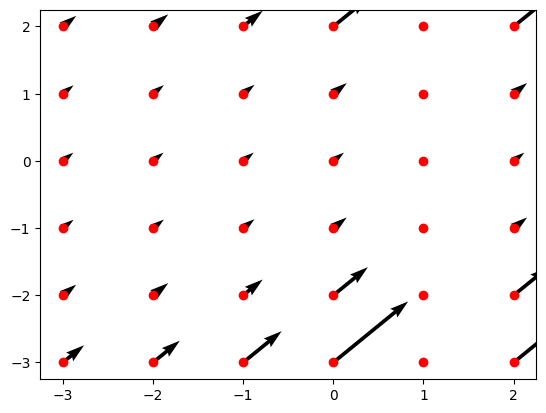

In [13]:
#normalize arrow length
dy = np.sqrt(dy**2 + dx**2)
dx = np.sqrt(dy**2 + dx**2)
plt.plot(X,Y, 'ro')
plt.quiver(X,Y,dx,dy)

### Population Models

A simple example of a model involving a differential equation could be the basic additive population growth model.  Here, suppose we have a constant rate of change $k$.  As a differential equation we would have:

$$\frac{dP}{dt} = k$$

We are familiar with the solution

$$P(t) = kt + c$$

In this notebook, we want to add complexity to this model and explore the results.  Obviously, assuming a constant rate of change in a population model is a fairly naive assumption.  Regardless, let's quickly revisit our methods for visualizing and solving a differential equation expressed in this form.





In [ ]:
x, k, t, P = sy.symbols('x k t P')

In [ ]:
def dp_dt(x,k):
    return k

In [ ]:
sy.integrate(dp_dt(x,k), t)

k*t

#### Exponential Growth

Last notebook, we saw the basic population model expressed as a differential equation.  Here, we should recall our earlier work with discrete sequences and the passage to the limit that determines the change from $\Delta P$ to $dP$.  We will rely heavily on this idea when modeling with differential equations.  For the simple exponential population model, as a differential equation we have

$$\frac{dP}{dt} = rP$$

whereas in the discrete case we have

$$\frac{\Delta P}{\Delta t} = rP \quad or \quad \Delta P = rP\Delta t$$

Returning to a basic example, suppose we know a population has size $P = 100$ at time $t=0$.  The population grows at a 0.24% growth rate.  If we consider this in terms of our abover relationship as a way to approximate solutions every $\Delta t = 0.1$, we get the following populations $p_i$.

$$p_0 = 100$$

$$p_1 = 100 + 0.0024(100)(0.1) \quad \text{or} \quad p_0(1+r)\Delta t$$

**Problem**: A certain city had a population of 25,000 and a growth rate of $r = 1.8%$.  Assume that its population will continue to grow exponentially at a constant rate, what population can its city planners expect in the year 2000?


We are interested in the effect of varying some of the parameters of the differential equation.  Here, we really only have two, the inital population and the growth rate.  Let's just vary the growth rate and describe the change in the resulting solutions.

In [ ]:
# def exp_grow(p0, r):
#     P = [p0]
#     for i in range(10):
#         next = p0*r**i
#         P.append(next)
#     plt.figure()
#     plt.plot(P, '-o')

# interact(exp_grow, r=(1.00,2.0,0.01), p0 = (100,500,25));

### The Logistic Differential Equation

The logistic equation was introduced by Pierre-Francois Verhulst in a discussion on the United States population growth.  In the middle of the 19th century, the United States was still expanding, and the population had followed exponential growth.  This could not continue however, as "the difficulty of finding good land has begun to make itself felt."



"*the population tends to grow in geometric progression while the production of food follows a more or less arithmetic progression*"--Verhulst 1845

This translates mathematically to the rate of births against those of deaths as a linear rate of change.  We can examine this through an example.  


Suppose we have a fish population that will stop growing at a population of 50,000.  We also know that when the population is 10,000, the population doubles.  Accordingly, if we plot population against growth rate we have two points $(10,000, 2)$ and $(50,000, 1)$.  What is an equation for the line that connects these points?

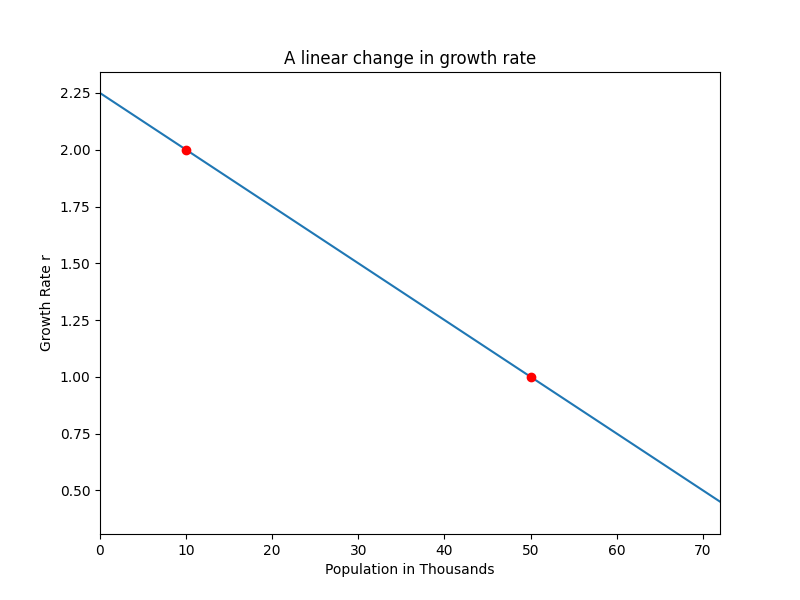

Now we want to find some values.  We can approximate these values using the earlier general population model.  In this situation we end up with:

$$p_{n+1} = r * p_n$$



Insert your expression for the rate of change from the previous problem, what is the final recurrence relationship for the fish population?  

### Experimenting with different rates

In general, we are dealing with the recurrence relationship

$$x_{n+1} = rx_n(1-x_n)$$

We've seen what happened in the fish population with a certain rate. Now we would like to see some other behavior by playing with values of $r$.

In [ ]:
def logistic_example2(r=1.0, N=100, x0 = 0.6):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = r*x[n]*(1. - x[n])
    return x

In [ ]:
c = logistic_example2(r=1.0, N=30)
print(c[:10])

[0.6        0.24       0.1824     0.14913024 0.12689041 0.11078923
 0.09851498 0.08880978 0.0809226  0.07437413]


In [ ]:
def plot_logistic2(i,x):
    plt.figure(figsize=(9,5))
    plt.plot(c[:i], '-ok', linewidth=2)
    plt.show();

In [ ]:
interact(plot_logistic2, i = widgets.IntSlider(min=0, max=len(c), step=1, value=0), x=fixed(x));

interactive(children=(IntSlider(value=0, description='i', max=30), Output()), _dom_classes=('widget-interact',…

#### Changing r

We can see some different kinds of behavior depending on altering the parameters $r$ and $x_0$.  Three things may happen.  Recall our equation:

$$x_{n+1} = x_n(1-x_n)$$

1. The values of $x_n$ get closer and closer to some limit value $x_\infty$ as $n \to \infty$.
2. The values of $x_n$ oscillate periodically among two or more values, repeating those values forever.
3. The values $x_n$ get larger and larger without bound.

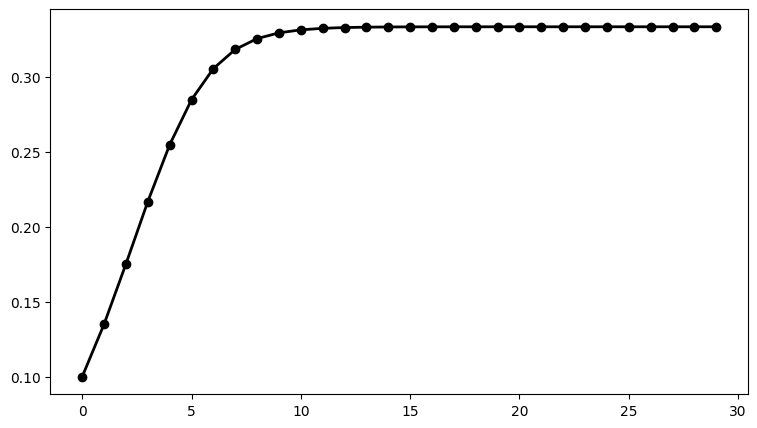

In [ ]:
x = logistic_example2(r=1.5,N=30,x0=1./10)
def plot_logistic2(i,x):
    plt.figure(figsize=(9,5))
    plt.plot(x[:i], '-ok', linewidth=2)
plot_logistic2(len(x),x)

### Exploration

Playing with the sliders below, answer the following:

1. For what values of $r$ does $x_n \to 0$?
2. What happens for slightly bigger values of $r$?
3. Can you find values of $r$ that generate periodic orbits (i.e., situation 2 from above list)?
4. How many different points are visited in the periodic case?
5. What happens for even bigger values of $r$?
6. Make sure to try the value $r = 3.83$. What do you observe?

In [ ]:
def logistic(r=1.0, N = 100, x0=0.2):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        x[n+1] = r * x[n] * (1. - x[n])
    plt.figure()
    ax1 = plt.subplot2grid((1,8), (0,0), colspan=7)
    ax2 = plt.subplot2grid((1,8), (0,7), colspan=1)

    ax1.plot(x, '-ok', linewidth=2)
    ax1.set_ylim(0,1)
    n = int(round(N/5))
    ax2.plot([0]*n,x[-n:],'or',markersize=10,alpha=0.1)
    ax2.set_ylim(0,1)
    ax2.axis('off')
    ax1.set_xlabel('r'); ax1.set_ylabel('x')
    plt.show();

interact(logistic,r=(0,4,0.01),x0=(0.01,1,0.1));



interactive(children=(FloatSlider(value=1.0, description='r', max=4.0, step=0.01), IntSlider(value=100, descri…

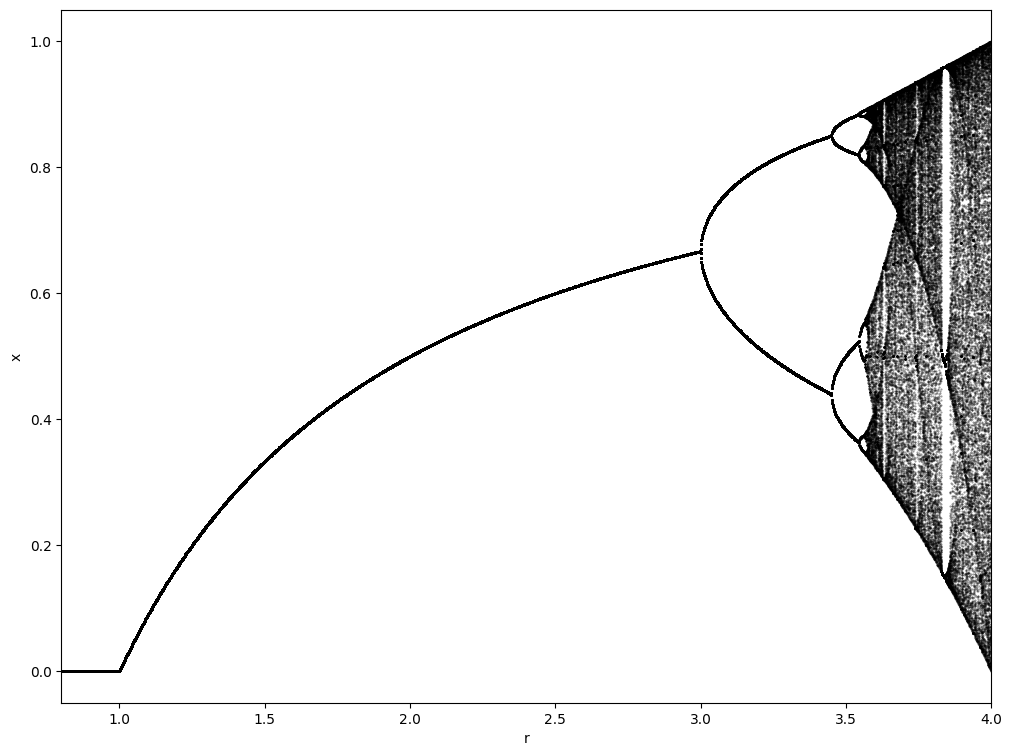

In [ ]:
def bifurcation_diagram(r=(0.8,4),N=2000,k=2000,m=200,x0=0.2):
    """
        r: Pair of numbers (rmin,rmax) indicating parameter range
        k: Number of samples in r
        N: Number of iterations per sequence
        m: keep just the last m iterates
    """
    x = np.zeros((k,N))
    vals = np.zeros((k,m))
    rs = np.linspace(r[0],r[1],k)
    x[:,0] = x0
    for n in range(N-1):
        x[:,n+1] = rs * x[:,n] * (1. - x[:,n])
    return rs, x[:,-m:]

plotargs = {'markersize':0.5, 'alpha':0.4}
rs, vals = bifurcation_diagram()
plt.figure(figsize=size)
plt.plot(rs,vals,'ok',**plotargs);
plt.xlim(rs.min(),rs.max());
plt.xlabel('r'); plt.ylabel('x');

**PROBLEM**

What is a solution to the differential equation:

$$\frac{dP}{dt} = .25P$$

with initial condition $P(0) = 2$.

Draw a slope field to represent the differential equation and plot your solution line.

**PROBLEM**

In 1969 Congress added a cost of living escalator clause to the federal civilian and military pension programs: For each 3% rise in the consumer price index that lasted 3 months, benefits would increase 4%.  The extra 1% kicker was to offset lost purchasing power during the 3-month qualifying period:

- In 1976 Senator Thomas Eagleton predicted that if the formula were maintained for 25 years, the costs of all federal pension programs would quadruple.  What rate of inflation would make that prediction correct?

- The same year, former Congressman Hastings Keith said, "One result of the staggering congressional practice is that taxpayers will have had to cough up an extra 300 billion by 1990 just to cover the unanticipated retirement costs of federal workers.  What's missing is the assumed inflation rate.  What was the rate?

In [ ]:
import sympy as sy